Epoch [1/1000], Loss: 1.0065
Epoch [101/1000], Loss: 1.0065
Epoch [201/1000], Loss: 1.0065
Epoch [301/1000], Loss: 1.0065
Epoch [401/1000], Loss: 1.0065
Epoch [501/1000], Loss: 1.0065
Epoch [601/1000], Loss: 1.0065
Epoch [701/1000], Loss: 1.0065
Epoch [801/1000], Loss: 1.0065
Epoch [901/1000], Loss: 1.0065
Epoch [1/1000], Loss: 1.0155
Epoch [101/1000], Loss: 1.0155
Epoch [201/1000], Loss: 1.0155
Epoch [301/1000], Loss: 1.0155
Epoch [401/1000], Loss: 1.0155
Epoch [501/1000], Loss: 1.0155
Epoch [601/1000], Loss: 1.0155
Epoch [701/1000], Loss: 1.0155
Epoch [801/1000], Loss: 1.0155
Epoch [901/1000], Loss: 1.0155
Epoch [1/1000], Loss: 1.0163
Epoch [101/1000], Loss: 0.9493
Epoch [201/1000], Loss: 0.9375
Epoch [301/1000], Loss: 0.9293
Epoch [401/1000], Loss: 0.9271
Epoch [501/1000], Loss: 0.9270
Epoch [601/1000], Loss: 0.9270
Epoch [701/1000], Loss: 0.9270
Epoch [801/1000], Loss: 0.9270
Epoch [901/1000], Loss: 0.9275
Predicted temperature: 13.69 °C
Predicted current: 31.43
Predicted Bias_Vott

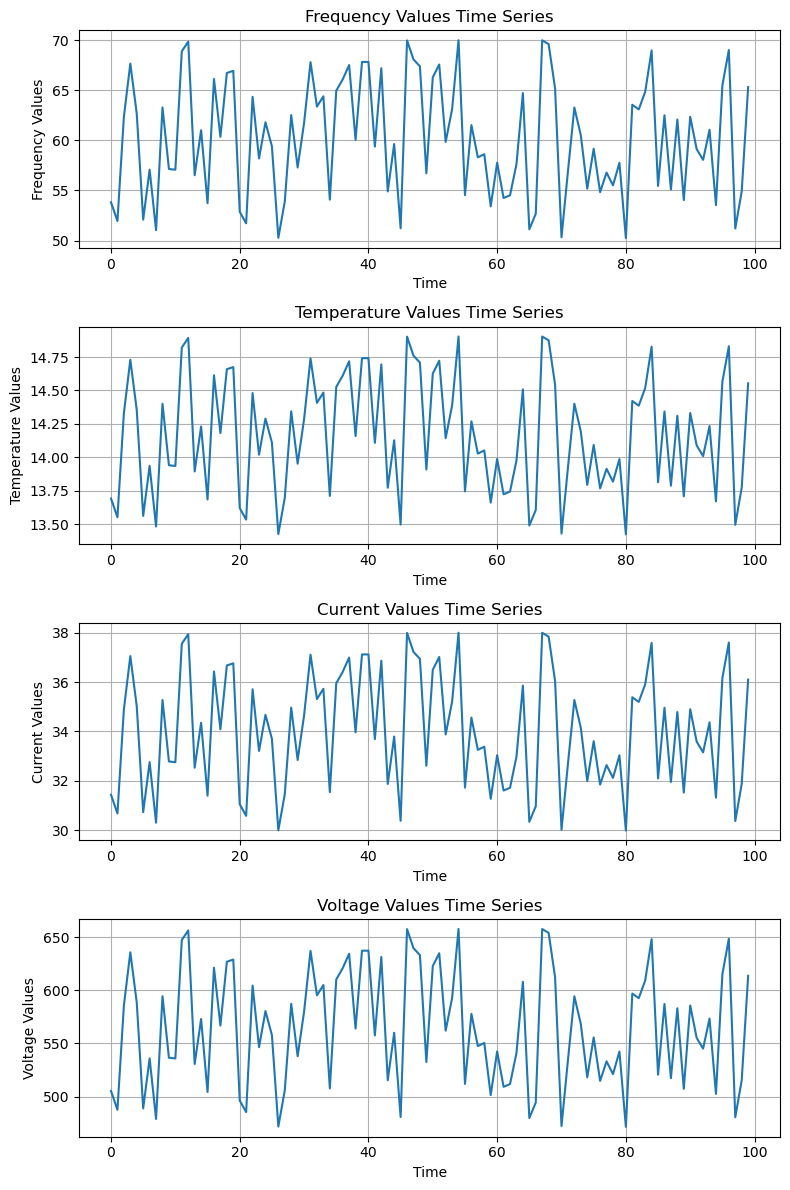

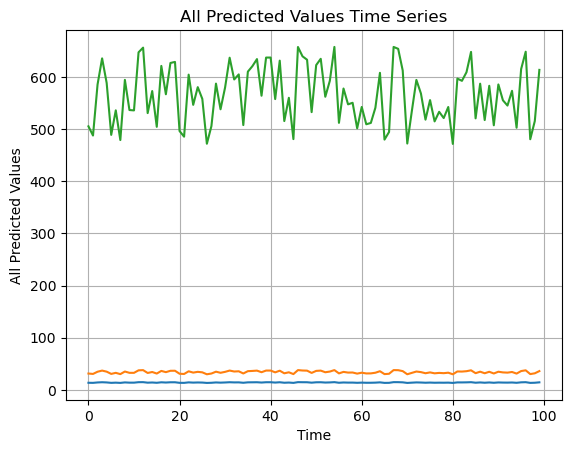

In [19]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
import random

# Step 1: Load and preprocess the dataset
data = pd.read_csv('optical_injection_locking.csv')
X = data['Frequency_Detuning'].values.reshape(-1, 1)  # Reshape to a 2D array
y1 = data['Temperature'].values.reshape(-1, 1)
y2 = data['Laser_Current'].values.reshape(-1, 1)
y3 = data['Bias_Vottage_of_Slave'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

# Standardize the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
y1_train = scaler_y.fit_transform(y1_train)
y2_train = scaler_y.fit_transform(y2_train)
y3_train = scaler_y.fit_transform(y3_train)

# Step 2: Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 3: Train the neural network
model1 = NeuralNetwork()
model2 = NeuralNetwork()
model3 = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)
optimizer = optim.Adam(model2.parameters(), lr=0.001)
optimizer = optim.Adam(model3.parameters(), lr=0.001)

epochs1 = 1000
for epoch in range(epochs1):
    inputs = torch.tensor(X_train, dtype=torch.float32)
    targets = torch.tensor(y1_train, dtype=torch.float32)

    optimizer.zero_grad()
    outputs = model1(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs1}], Loss: {loss.item():.4f}')

epochs2 = 1000
for epoch in range(epochs2):
    inputs = torch.tensor(X_train, dtype=torch.float32)
    targets = torch.tensor(y2_train, dtype=torch.float32)

    optimizer.zero_grad()
    outputs = model2(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs2}], Loss: {loss.item():.4f}')

epochs3 = 1000
for epoch in range(epochs3):
    inputs = torch.tensor(X_train, dtype=torch.float32)
    targets = torch.tensor(y3_train, dtype=torch.float32)

    optimizer.zero_grad()
    outputs = model3(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs3}], Loss: {loss.item():.4f}')

torch.save(model1.state_dict(), "model1.pth")
torch.save(model2.state_dict(), "model2.pth")
torch.save(model3.state_dict(), "model3.pth")

# Step 4: Provide a function to get predictions based on user input for frequency detuning
def get_prediction1(freq_detuning):
    scaled_input = scaler_X.transform([[freq_detuning]])
    with torch.no_grad():
        prediction = model1(torch.tensor(scaled_input, dtype=torch.float32)).numpy()
    prediction = scaler_y.inverse_transform(prediction)
    return prediction[0][0]

def get_prediction2(freq_detuning):
    scaled_input = scaler_X.transform([[freq_detuning]])
    with torch.no_grad():
        prediction = model2(torch.tensor(scaled_input, dtype=torch.float32)).numpy()
    prediction = scaler_y.inverse_transform(prediction)
    return prediction[0][0]

def get_prediction3(freq_detuning):
    scaled_input = scaler_X.transform([[freq_detuning]])
    with torch.no_grad():
        prediction = model3(torch.tensor(scaled_input, dtype=torch.float32)).numpy()
    prediction = scaler_y.inverse_transform(prediction)
    return prediction[0][0]

random_values = [random.uniform(50, 70) for _ in range(100)]
pred_temp=[]
pred_current=[]
pred_voltage=[]
# Example usage
for value in random_values:
    predicted_temperature = get_prediction1(value)
    pred_temp.append(predicted_temperature)
    predicted_current = get_prediction2(value)
    pred_current.append(predicted_current)
    predicted_voltage = get_prediction3(value)
    pred_voltage.append(predicted_voltage)
    print(f"Predicted temperature: {predicted_temperature:.2f} °C")
    print(f"Predicted current: {predicted_current:.2f}")
    print(f"Predicted Bias_Vottage_of_Slave: {predicted_voltage:.2f} V")
# Create a figure and subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

axs[0].plot(range(len(random_values)), random_values)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Frequency Values')
axs[0].set_title('Frequency Values Time Series')
axs[0].grid(True)
# Plot pred_temp
axs[1].plot(range(len(pred_temp)), pred_temp)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Temperature Values')
axs[1].set_title('Temperature Values Time Series')
axs[1].grid(True)

# Plot pred_current
axs[2].plot(range(len(pred_current)), pred_current)
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Current Values')
axs[2].set_title('Current Values Time Series')
axs[2].grid(True)

# Plot pred_voltage
axs[3].plot(range(len(pred_voltage)), pred_voltage)
axs[3].set_xlabel('Time')
axs[3].set_ylabel('Voltage Values')
axs[3].set_title('Voltage Values Time Series')
axs[3].grid(True)

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show plot
plt.show()

plt.plot(range(len(pred_temp)), pred_temp)
plt.xlabel('Time')
plt.ylabel('Temp Values')
plt.title('Temp Values Time Series')
plt.grid(True)
plt.plot(range(len(pred_current)), pred_current)
plt.xlabel('Time')
plt.ylabel('Current Values')
plt.title('Current Values Time Series')
plt.grid(True)
plt.plot(range(len(pred_voltage)), pred_voltage)
plt.xlabel('Time')
plt.ylabel('All Predicted Values')
plt.title('All Predicted Values Time Series')
plt.grid(True)
plt.show()